<h1>决策树</h1>

决策树(Decision Tree） 是广泛用于 分类(classification) 和 回归(regression) 任务的模型。本质上,它从一层层的 if/else 问题中进行学习,并得出结论。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

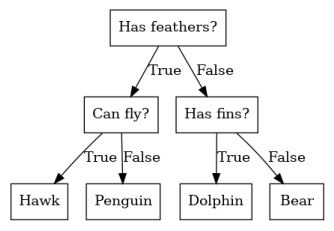

In [2]:
mglearn.plots.plot_animal_tree()

<h2>1.决策树的概念</h2>

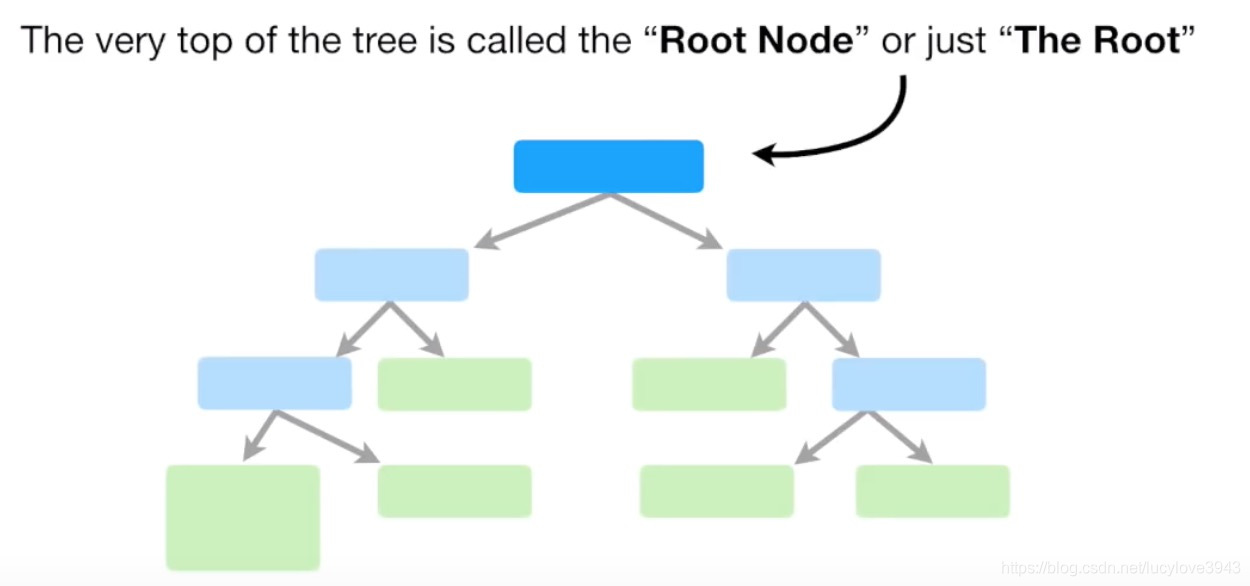

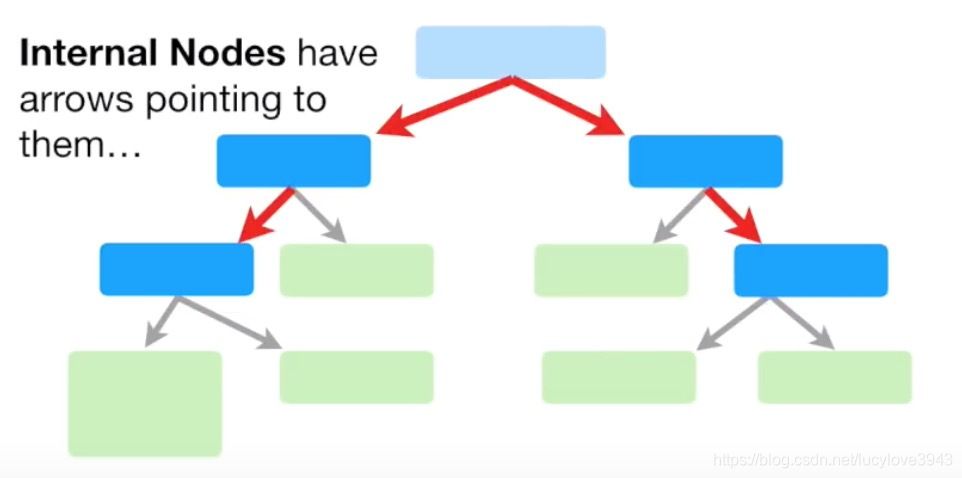

叶子结点(Leaf Nodes)：如图所示仅仅只有父节点的节点叫做叶子结点。

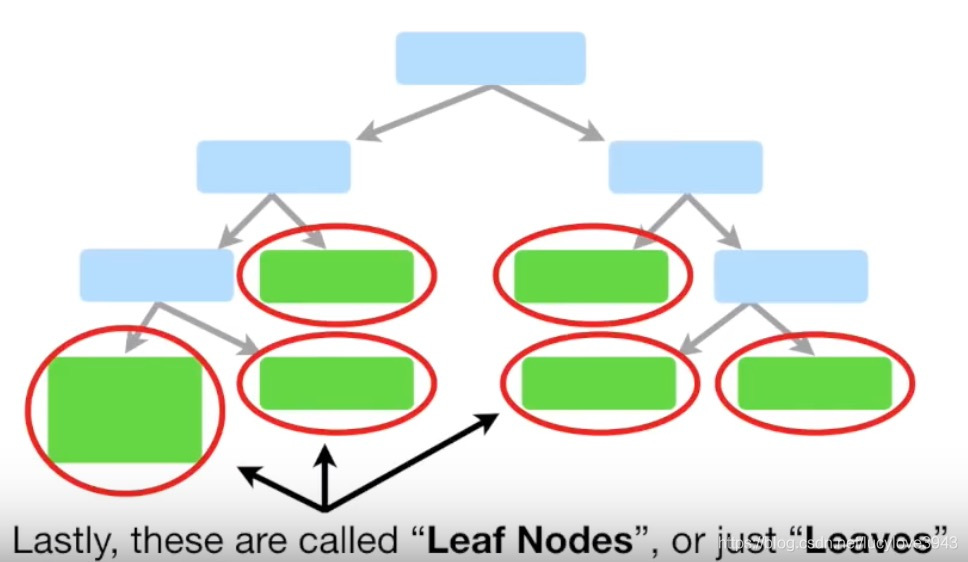

<h2>2.构造决策树</h2>

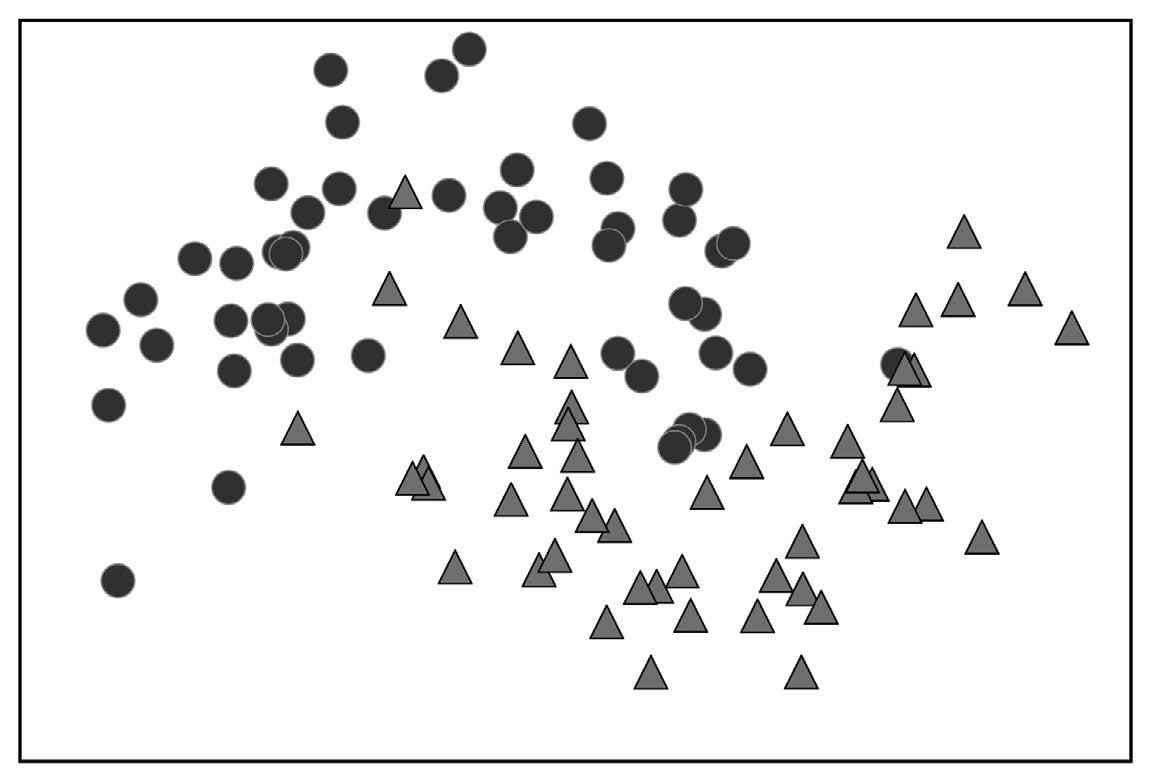

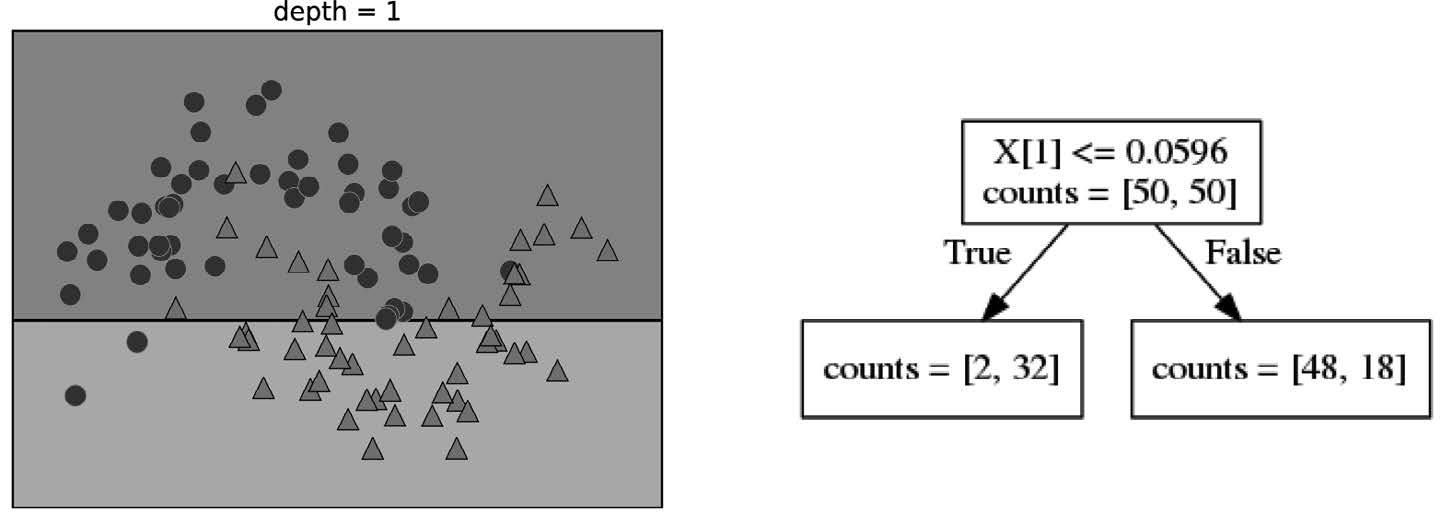

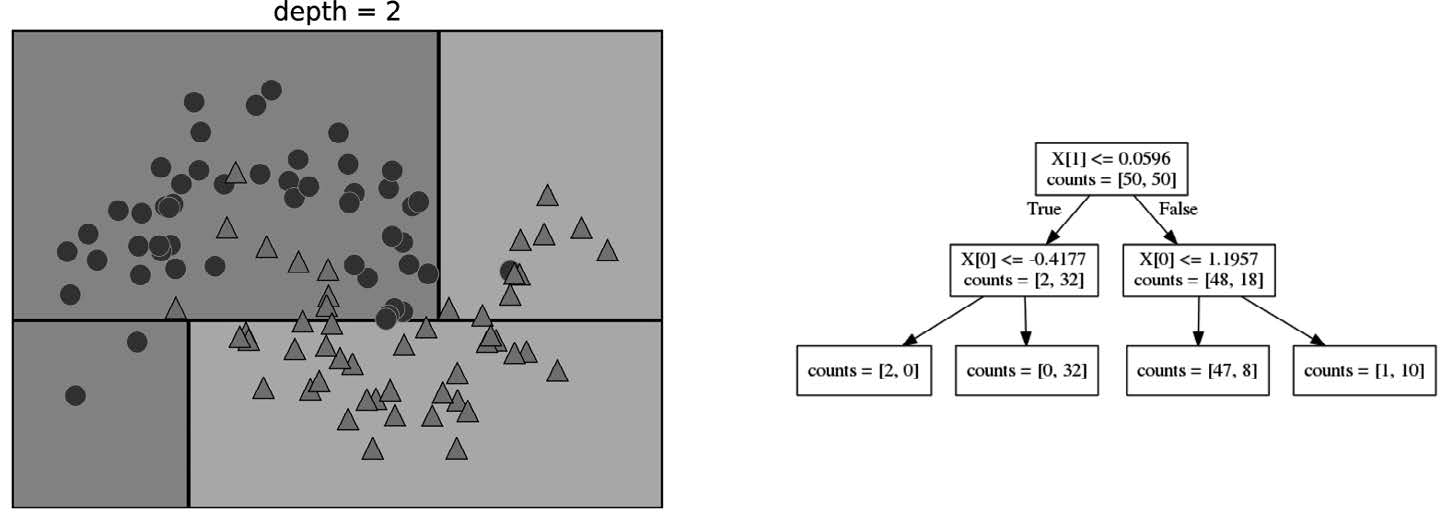

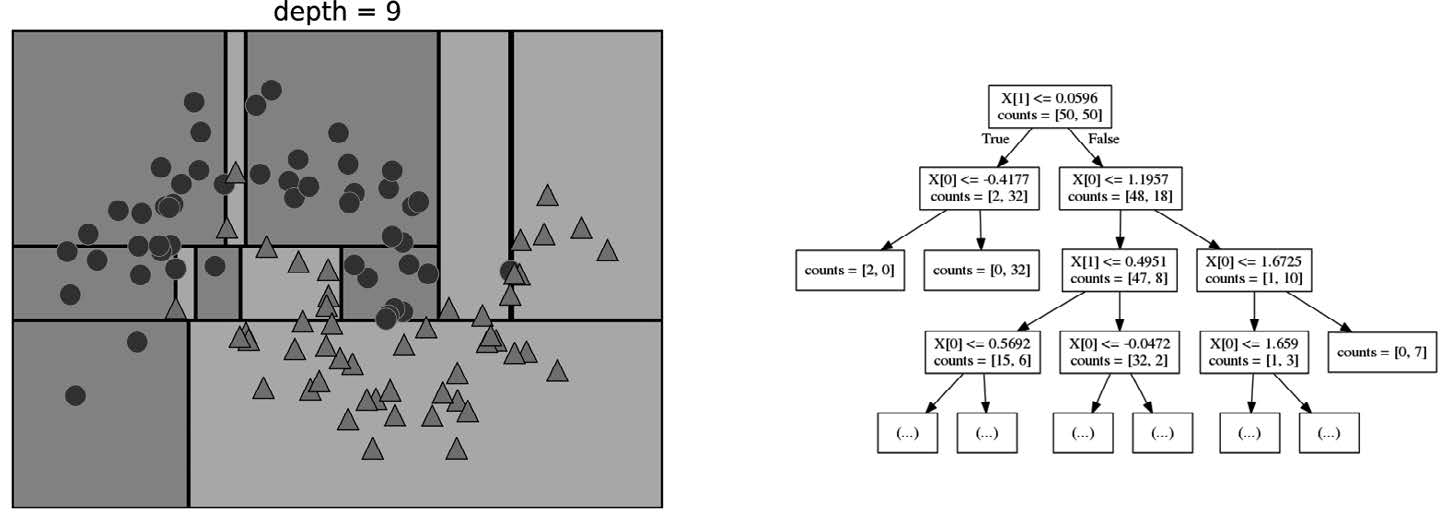

<h2>3.控制决策树的复杂度--乳腺癌实例</h2>

In [3]:
#导入乳腺癌数据集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
#分出 训练数据(training data) 和 测试数据(test data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#cancer.data 为 train_data，即所要划分的样本特征集
#cancer.target 为 train_target，即所要划分的样本结果，目标变量
#用了stratify参数，training集和testing集的类的比例是 A：B= 4：1
# random_state：是随机数的种子。
# 随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。

In [5]:
#使用 训练数据 构建模型，并测试 训练精度
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [6]:
#限制树的深度为4，并重新构建模型，测试 训练精度
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


<h2>4.分析决策树</h2>

In [7]:
#将树可视化，生成本地文件
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

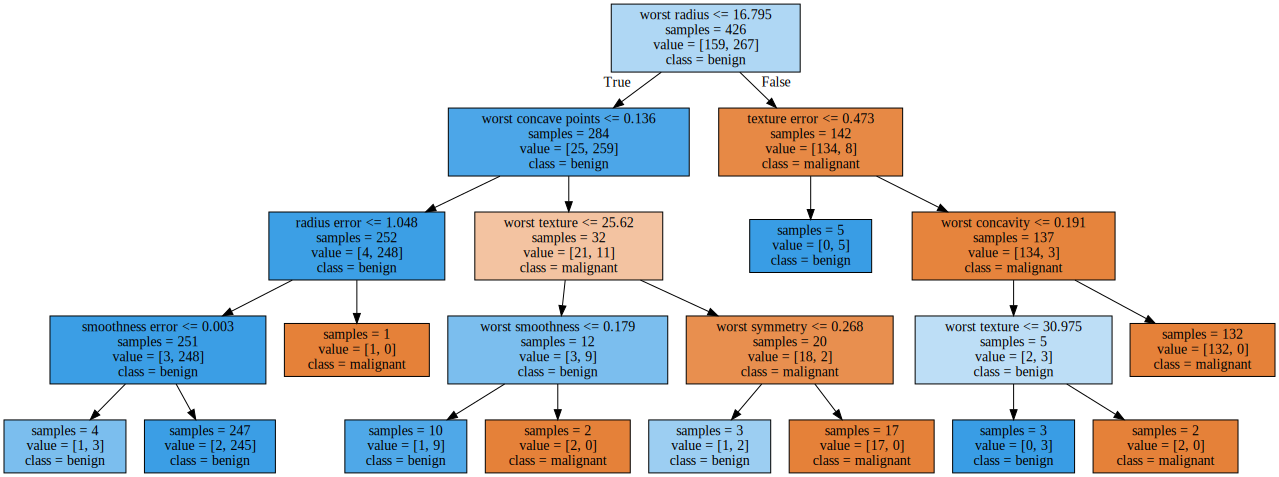

In [8]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<h3>5.树的特征重要性</h3>

In [9]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


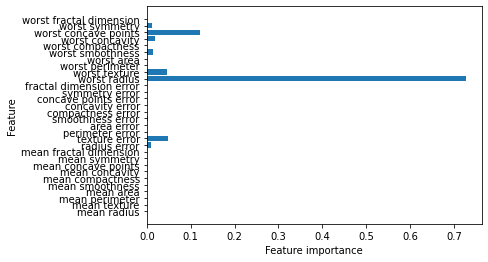

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)